# 참고자료

* 전통시장 DT - 긱허브
    * https://github.com/jjonhwa/Policy-to-utilize-DT-in-traditional-markets/tree/main/preprocess

* 또따스토리지
    * GITHUB : https://github.com/panghyuk/BigdataCampus
    * 발표영상 : https://www.youtube.com/watch?v=NdITDSZBirE

# Imports

In [ ]:
# 코랩 한글 설치 - 실행 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (41.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
# 코랩 한글 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 기본 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns

# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 경고 무시
import warnings
warnings.filterwarnings(action = 'ignore')

Mounted at /content/drive


# 필요 데이터셋 load

## 1. 주변특성(around_num)

* 구청 및 주민센터(y) + 주변특성(개수)

In [ ]:
around_num = pd.read_excel('/content/drive/MyDrive/공유폴더/완성데이터/주변특성_개수_지하철, 버정, 공원, 도서관, 병원, 배움터.xlsx')
around_num

,name,동,지하철 호선 개수(250m),버스정류장 개수(100m),공원 개수(500m),도서관 개수(500m),병원 개수(500m),배움터 개수(500m)
0,청운효자동 주민센터,청운효자동,0.0,1.0,0.0,0.0,0.0,0.0
1,사직동 주민센터,사직동,0.0,1.0,1.0,2.0,0.0,0.0
2,종로1.2.3.4가동 주민센터,종로1.2.3.4가동,1.0,4.0,1.0,0.0,1.0,2.0
3,삼청동 주민센터,삼청동,0.0,3.0,0.0,1.0,0.0,0.0
4,가회동 주민센터,가회동,0.0,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
444,청룡동 관악구청,청룡동,0.0,2.0,0.0,0.0,0.0,0.0
445,서초2동 서초구청,서초2동,2.0,1.0,0.0,0.0,0.0,1.0
446,삼성2동 강남구청,삼성2동,0.0,2.0,0.0,2.0,0.0,1.0
447,신천동 송파구청,잠실6동,1.0,0.0,0.0,0.0,0.0,0.0


### ['대중교통'] 파생변수 생성 

* ['대중교통'] = ['버스 정류장'] + ['지하철']

In [ ]:
# 대중교통 파생변수 생성 : 버정 + 지하철
around_num['대중교통'] = around_num['지하철 호선 개수(250m)'] + around_num['버스정류장 개수(100m)']

# 지하철, 버정 컬럼 drop
around_num = around_num.drop(columns=['지하철 호선 개수(250m)','버스정류장 개수(100m)'])

around_num

,name,동,공원 개수(500m),도서관 개수(500m),병원 개수(500m),배움터 개수(500m),대중교통
0,청운효자동 주민센터,청운효자동,0.0,0.0,0.0,0.0,1.0
1,사직동 주민센터,사직동,1.0,2.0,0.0,0.0,1.0
2,종로1.2.3.4가동 주민센터,종로1.2.3.4가동,1.0,0.0,1.0,2.0,5.0
3,삼청동 주민센터,삼청동,0.0,1.0,0.0,0.0,3.0
4,가회동 주민센터,가회동,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...
444,청룡동 관악구청,청룡동,0.0,0.0,0.0,0.0,2.0
445,서초2동 서초구청,서초2동,0.0,0.0,0.0,1.0,3.0
446,삼성2동 강남구청,삼성2동,0.0,2.0,0.0,1.0,2.0
447,신천동 송파구청,잠실6동,0.0,0.0,0.0,0.0,1.0


## 2. 인구특성(senior_population) 

* 구, 동, 동별독거노인인구, 65세 이상

In [ ]:
senior = pd.read_csv('/content/drive/MyDrive/공유폴더/완성데이터/인구특성_구,동,시니어수.csv')
senior

,자치구,동,합계,국민기초생활보장수급권자,저소득노인,일반,인구,65세이상고령자,전연령별독거노인비율
0,종로구,사직동,590,52,18,520,9806,1843,6.016724
1,종로구,삼청동,240,16,3,221,2909,674,8.250258
2,종로구,부암동,489,44,8,437,10333,1839,4.732411
3,종로구,평창동,754,44,15,695,18582,3398,4.057690
4,종로구,무악동,334,62,11,261,8592,1460,3.887337
...,...,...,...,...,...,...,...,...,...
420,강동구,둔촌1동,1,0,0,1,262,97,0.381679
421,강동구,둔촌2동,829,160,49,620,26413,4135,3.138606
422,강동구,암사1동,1476,425,79,972,35728,5965,4.131214
423,강동구,천호2동,1673,535,77,1061,35251,5969,4.745965


In [ ]:
# senior 데이터 셋에서 사용할 칼럼만 슬라이싱

senior_population = senior.loc[:, ['자치구', '동',	'합계', '65세이상고령자']]
senior_population

,자치구,동,합계,65세이상고령자
0,종로구,사직동,590,1843
1,종로구,삼청동,240,674
2,종로구,부암동,489,1839
3,종로구,평창동,754,3398
4,종로구,무악동,334,1460
...,...,...,...,...
420,강동구,둔촌1동,1,97
421,강동구,둔촌2동,829,4135
422,강동구,암사1동,1476,5965
423,강동구,천호2동,1673,5969


In [ ]:
# 알아보기 쉽게 '합계' 칼럼명 -> '동별 독거노인 인구 합계'로 수정: 

senior_population = senior_population.rename(columns={'합계':'동별 독거노인 인구 합계'})
senior_population

,자치구,동,동별 독거노인 인구 합계,65세이상고령자
0,종로구,사직동,590,1843
1,종로구,삼청동,240,674
2,종로구,부암동,489,1839
3,종로구,평창동,754,3398
4,종로구,무악동,334,1460
...,...,...,...,...
420,강동구,둔촌1동,1,97
421,강동구,둔촌2동,829,4135
422,강동구,암사1동,1476,5965
423,강동구,천호2동,1673,5969


### ['독거노인포함'] 파생변수 생성

* ['독거노인포함'] = ['동별독거노인인구'] * ['65세이상']

In [ ]:
# 독거노인포함 파생변수 생성
senior_population['독거노인포함'] = senior_population['동별 독거노인 인구 합계'] * senior_population['65세이상고령자']

# 기존 컬럼 drop : 동별 독거노인 인구 합계, 65세이상고령자
senior_population.drop(columns=['동별 독거노인 인구 합계', '65세이상고령자'], inplace=True)

senior_population

,자치구,동,독거노인포함
0,종로구,사직동,1087370
1,종로구,삼청동,161760
2,종로구,부암동,899271
3,종로구,평창동,2562092
4,종로구,무악동,487640
...,...,...,...
420,강동구,둔촌1동,97
421,강동구,둔촌2동,3427915
422,강동구,암사1동,8804340
423,강동구,천호2동,9986137


## 시설특성(class_num) 

* 동별강좌정원

In [ ]:
class_num = pd.read_csv('/content/drive/MyDrive/공유폴더/완성데이터/인구특성+시설특성_독거노인수, 동별 강좌갯수,정원.csv')
class_num

,자치구,동,동별 독거노인 인구 합계,동별 강좌 총 갯수,동별 강좌 총 정원
0,종로구,사직동,590,1.0,50.0
1,종로구,삼청동,240,NaN,NaN
2,종로구,부암동,489,NaN,NaN
3,종로구,평창동,754,NaN,NaN
4,종로구,무악동,334,6.0,140.0
...,...,...,...,...,...
420,강동구,둔촌1동,1,NaN,NaN
421,강동구,둔촌2동,829,13.0,335.0
422,강동구,암사1동,1476,14.0,380.0
423,강동구,천호2동,1673,NaN,NaN


In [ ]:
# 불필요한 칼럼 삭제 : 동별 독거노인 인구 합계
# 다른 데이터셋에서 슬라이싱 함.
class_num.drop(columns=['동별 독거노인 인구 합계'], inplace=True)
class_num

,자치구,동,동별 강좌 총 갯수,동별 강좌 총 정원
0,종로구,사직동,1.0,50.0
1,종로구,삼청동,NaN,NaN
2,종로구,부암동,NaN,NaN
3,종로구,평창동,NaN,NaN
4,종로구,무악동,6.0,140.0
...,...,...,...,...
420,강동구,둔촌1동,NaN,NaN
421,강동구,둔촌2동,13.0,335.0
422,강동구,암사1동,14.0,380.0
423,강동구,천호2동,NaN,NaN


In [ ]:
class_num.isnull().sum()

자치구            0
동              0
동별 강좌 총 갯수    97
동별 강좌 총 정원    97
dtype: int64

### 결측치 처리 

1. 강좌 총 갯수 na 값 : 0으로 처리.
2. 강좌 총 갯수 = 0이면, 강좌 총 정원 = 0 으로 처리.

In [ ]:
# 강좌 총 갯수 na값 0으로 채우기
class_num['동별 강좌 총 갯수'].fillna(0, inplace=True)

In [ ]:
# 강좌 총 갯수=0이면, 강좌 총 정원 na값 0으로 채우기
# class_num['동별 강좌 총 정원'] = class_num[class_num['동별 강좌 총 갯수']==0]['동별 강좌 총 정원'].fillna(0)

In [ ]:
class_num.isnull().sum()

자치구            0
동              0
동별 강좌 총 갯수     0
동별 강좌 총 정원    97
dtype: int64

In [ ]:
class_num  # na값이 0으로 채워졌다.

,자치구,동,동별 강좌 총 갯수,동별 강좌 총 정원
0,종로구,사직동,1.0,50.0
1,종로구,삼청동,0.0,NaN
2,종로구,부암동,0.0,NaN
3,종로구,평창동,0.0,NaN
4,종로구,무악동,6.0,140.0
...,...,...,...,...
420,강동구,둔촌1동,0.0,NaN
421,강동구,둔촌2동,13.0,335.0
422,강동구,암사1동,14.0,380.0
423,강동구,천호2동,0.0,NaN


In [ ]:
class_num[class_num['동별 강좌 총 갯수'] == 0]['동별 강좌 총 정원'].isnull().sum()

# 동별 강좌 총 정원이 nan인 값은, 전부 강좌 총 갯수가 0이다.
# 따라서, 동별 강좌 총 정원 na값도 0으로 채워준다.

97

In [ ]:
class_num['동별 강좌 총 정원'].fillna(0, inplace=True)

In [ ]:
class_num.isnull().sum()  # na값이 모두 채워졌다.

자치구           0
동             0
동별 강좌 총 갯수    0
동별 강좌 총 정원    0
dtype: int64

In [ ]:
# float -> int로 타입 변환
class_num['동별 강좌 총 정원'] = class_num['동별 강좌 총 정원'].astype('int')

In [ ]:
class_num.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   자치구         425 non-null    object 
 1   동           425 non-null    object 
 2   동별 강좌 총 갯수  425 non-null    float64
 3   동별 강좌 총 정원  425 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 13.4+ KB


In [ ]:
# 모델링에 필요한 요인은 '동별 강좌 총 정원'만임.
class_num.drop(columns=['동별 강좌 총 갯수'], inplace=True)
class_num

,자치구,동,동별 강좌 총 정원
0,종로구,사직동,50
1,종로구,삼청동,0
2,종로구,부암동,0
3,종로구,평창동,0
4,종로구,무악동,140
...,...,...,...
420,강동구,둔촌1동,0
421,강동구,둔촌2동,335
422,강동구,암사1동,380
423,강동구,천호2동,0


## 사고건수, 사상자수(acci)

In [ ]:
acci = pd.read_csv('/content/drive/MyDrive/공유폴더/완성데이터/사고건수, 사상자수, 주민센터(y).csv')
acci

,사고건수,사상자수,name
0,6,6,신당5동 주민센터
1,24,29,상도3동 주민센터
2,3,3,장안2동 주민센터
3,3,3,쌍문1동 주민센터
4,4,4,갈현1동 주민센터
5,3,3,정릉4동 주민센터
6,7,7,신내2동 중랑구청
7,4,4,녹번동 은평구청
8,6,6,당산1동 영등포구청
9,4,6,신천동 송파구청


In [ ]:
# 사고건수만 쓰기로 했으므로, 사상자수 drop

acci.drop(columns=['사상자수'], inplace=True)
acci

,사고건수,name
0,6,신당5동 주민센터
1,24,상도3동 주민센터
2,3,장안2동 주민센터
3,3,쌍문1동 주민센터
4,4,갈현1동 주민센터
5,3,정릉4동 주민센터
6,7,신내2동 중랑구청
7,4,녹번동 은평구청
8,6,당산1동 영등포구청
9,4,신천동 송파구청


# 데이터셋 합치기 : final_merge

* 종속변수(key column) : name. 총 449행

## 주변특성 + 사고건수: final

In [ ]:
around_num.head()

,name,동,공원 개수(500m),도서관 개수(500m),병원 개수(500m),배움터 개수(500m),대중교통
0,청운효자동 주민센터,청운효자동,0.0,0.0,0.0,0.0,1.0
1,사직동 주민센터,사직동,1.0,2.0,0.0,0.0,1.0
2,종로1.2.3.4가동 주민센터,종로1.2.3.4가동,1.0,0.0,1.0,2.0,5.0
3,삼청동 주민센터,삼청동,0.0,1.0,0.0,0.0,3.0
4,가회동 주민센터,가회동,0.0,1.0,0.0,0.0,2.0


In [ ]:
around_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          449 non-null    object 
 1   동             449 non-null    object 
 2   공원 개수(500m)   449 non-null    float64
 3   도서관 개수(500m)  449 non-null    float64
 4   병원 개수(500m)   449 non-null    float64
 5   배움터 개수(500m)  449 non-null    float64
 6   대중교통          449 non-null    float64
dtypes: float64(5), object(2)
memory usage: 24.7+ KB


In [ ]:
acci.head()

,사고건수,name
0,6,신당5동 주민센터
1,24,상도3동 주민센터
2,3,장안2동 주민센터
3,3,쌍문1동 주민센터
4,4,갈현1동 주민센터


In [ ]:
acci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사고건수    14 non-null     int64 
 1   name    14 non-null     object
dtypes: int64(1), object(1)
memory usage: 352.0+ bytes


In [ ]:
final = pd.merge(around_num, acci, how='left', on=['name'])
final

,name,동,공원 개수(500m),도서관 개수(500m),병원 개수(500m),배움터 개수(500m),대중교통,사고건수
0,청운효자동 주민센터,청운효자동,0.0,0.0,0.0,0.0,1.0,NaN
1,사직동 주민센터,사직동,1.0,2.0,0.0,0.0,1.0,NaN
2,종로1.2.3.4가동 주민센터,종로1.2.3.4가동,1.0,0.0,1.0,2.0,5.0,NaN
3,삼청동 주민센터,삼청동,0.0,1.0,0.0,0.0,3.0,NaN
4,가회동 주민센터,가회동,0.0,1.0,0.0,0.0,2.0,NaN
...,...,...,...,...,...,...,...,...
444,청룡동 관악구청,청룡동,0.0,0.0,0.0,0.0,2.0,3.0
445,서초2동 서초구청,서초2동,0.0,0.0,0.0,1.0,3.0,NaN
446,삼성2동 강남구청,삼성2동,0.0,2.0,0.0,1.0,2.0,NaN
447,신천동 송파구청,잠실6동,0.0,0.0,0.0,0.0,1.0,4.0


In [ ]:
# 사고건수에만 na값이 생겨서, 0으로 채워준다.
final.fillna(0, inplace=True)

In [ ]:
final.info()  # na값 없어짐.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          449 non-null    object 
 1   동             449 non-null    object 
 2   공원 개수(500m)   449 non-null    float64
 3   도서관 개수(500m)  449 non-null    float64
 4   병원 개수(500m)   449 non-null    float64
 5   배움터 개수(500m)  449 non-null    float64
 6   대중교통          449 non-null    float64
 7   사고건수          449 non-null    float64
dtypes: float64(6), object(2)
memory usage: 31.6+ KB


## 인구특성 + 시설특성: result

In [ ]:
senior_population.head()

,자치구,동,독거노인포함
0,종로구,사직동,1087370
1,종로구,삼청동,161760
2,종로구,부암동,899271
3,종로구,평창동,2562092
4,종로구,무악동,487640


In [ ]:
class_num.head()

,자치구,동,동별 강좌 총 정원
0,종로구,사직동,50
1,종로구,삼청동,0
2,종로구,부암동,0
3,종로구,평창동,0
4,종로구,무악동,140


In [ ]:
senior_population.shape, class_num.shape

((425, 3), (425, 3))

In [ ]:
result = pd.merge(senior_population, class_num, how='inner', on=['자치구', '동'])
result

,자치구,동,독거노인포함,동별 강좌 총 정원
0,종로구,사직동,1087370,50
1,종로구,삼청동,161760,0
2,종로구,부암동,899271,0
3,종로구,평창동,2562092,0
4,종로구,무악동,487640,140
...,...,...,...,...
420,강동구,둔촌1동,97,0
421,강동구,둔촌2동,3427915,335
422,강동구,암사1동,8804340,380
423,강동구,천호2동,9986137,0


## 최종 합치기 : final + result

* merge 기준 칼럼 : final['동']
* 최종 종속변수(y) : 'name'

In [ ]:
final.head()

,name,동,공원 개수(500m),도서관 개수(500m),병원 개수(500m),배움터 개수(500m),대중교통,사고건수
0,청운효자동 주민센터,청운효자동,0.0,0.0,0.0,0.0,1.0,0.0
1,사직동 주민센터,사직동,1.0,2.0,0.0,0.0,1.0,0.0
2,종로1.2.3.4가동 주민센터,종로1.2.3.4가동,1.0,0.0,1.0,2.0,5.0,0.0
3,삼청동 주민센터,삼청동,0.0,1.0,0.0,0.0,3.0,0.0
4,가회동 주민센터,가회동,0.0,1.0,0.0,0.0,2.0,0.0


In [ ]:
result.head()

,자치구,동,독거노인포함,동별 강좌 총 정원
0,종로구,사직동,1087370,50
1,종로구,삼청동,161760,0
2,종로구,부암동,899271,0
3,종로구,평창동,2562092,0
4,종로구,무악동,487640,140


In [ ]:
final.shape, result.shape

((449, 8), (425, 4))

In [ ]:
final_merge = pd.merge(final, result, how='left', on=['동'])
final_merge

,name,동,공원 개수(500m),도서관 개수(500m),병원 개수(500m),배움터 개수(500m),대중교통,사고건수,자치구,독거노인포함,동별 강좌 총 정원
0,청운효자동 주민센터,청운효자동,0.0,0.0,0.0,0.0,1.0,0.0,종로구,1358396,70
1,사직동 주민센터,사직동,1.0,2.0,0.0,0.0,1.0,0.0,종로구,1087370,50
2,종로1.2.3.4가동 주민센터,종로1.2.3.4가동,1.0,0.0,1.0,2.0,5.0,0.0,종로구,2558435,360
3,삼청동 주민센터,삼청동,0.0,1.0,0.0,0.0,3.0,0.0,종로구,161760,0
4,가회동 주민센터,가회동,0.0,1.0,0.0,0.0,2.0,0.0,종로구,277352,0
...,...,...,...,...,...,...,...,...,...,...,...
446,청룡동 관악구청,청룡동,0.0,0.0,0.0,0.0,2.0,3.0,관악구,5942970,443
447,서초2동 서초구청,서초2동,0.0,0.0,0.0,1.0,3.0,0.0,서초구,943800,489
448,삼성2동 강남구청,삼성2동,0.0,2.0,0.0,1.0,2.0,0.0,강남구,1988884,0
449,신천동 송파구청,잠실6동,0.0,0.0,0.0,0.0,1.0,4.0,송파구,857460,620


In [ ]:
final_merge.shape

(451, 11)

In [ ]:
final_merge['동'].value_counts()

신사동     4
신내2동    2
구로2동    2
화곡6동    2
방학1동    2
       ..
쌍문1동    1
인수동     1
우이동     1
수유2동    1
강일동     1
Name: 동, Length: 423, dtype: int64

In [ ]:
# 신사동이 강남구 1개, 관악구 1개여서, merge시 중복값이 생겼다.
final_merge[final_merge['동']=='신사동']

,name,동,공원 개수(500m),도서관 개수(500m),병원 개수(500m),배움터 개수(500m),대중교통,사고건수,자치구,독거노인포함,동별 강좌 총 정원
335,신사동 주민센터,신사동,0.0,0.0,0.0,0.0,1.0,0.0,관악구,3534054,204
336,신사동 주민센터,신사동,0.0,0.0,0.0,0.0,1.0,0.0,강남구,1374647,0
370,신사동 주민센터,신사동,0.0,0.0,0.0,0.0,1.0,0.0,관악구,3534054,204
371,신사동 주민센터,신사동,0.0,0.0,0.0,0.0,1.0,0.0,강남구,1374647,0


In [ ]:
# 잘못들어간 2개 행을 drop 해준다.
final_merge.drop(index=370, inplace=True)
final_merge.drop(index=371, inplace=True)

In [ ]:
final_merge['동'].value_counts()

신내2동    2
구로2동    2
화곡6동    2
방학1동    2
수유3동    2
       ..
쌍문1동    1
인수동     1
우이동     1
수유2동    1
강일동     1
Name: 동, Length: 423, dtype: int64

In [ ]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 450
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          449 non-null    object 
 1   동             449 non-null    object 
 2   공원 개수(500m)   449 non-null    float64
 3   도서관 개수(500m)  449 non-null    float64
 4   병원 개수(500m)   449 non-null    float64
 5   배움터 개수(500m)  449 non-null    float64
 6   대중교통          449 non-null    float64
 7   사고건수          449 non-null    float64
 8   자치구           449 non-null    object 
 9   독거노인포함        449 non-null    int64  
 10  동별 강좌 총 정원    449 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 42.1+ KB


# 최종 데이터셋 : final_merge

In [ ]:
final_merge.head()

,name,동,공원 개수(500m),도서관 개수(500m),병원 개수(500m),배움터 개수(500m),대중교통,사고건수,자치구,독거노인포함,동별 강좌 총 정원
0,청운효자동 주민센터,청운효자동,0.0,0.0,0.0,0.0,1.0,0.0,종로구,1358396,70
1,사직동 주민센터,사직동,1.0,2.0,0.0,0.0,1.0,0.0,종로구,1087370,50
2,종로1.2.3.4가동 주민센터,종로1.2.3.4가동,1.0,0.0,1.0,2.0,5.0,0.0,종로구,2558435,360
3,삼청동 주민센터,삼청동,0.0,1.0,0.0,0.0,3.0,0.0,종로구,161760,0
4,가회동 주민센터,가회동,0.0,1.0,0.0,0.0,2.0,0.0,종로구,277352,0


In [ ]:
# 컬럼명 '리얼파이널_컷오프완료_양천구청포함.csv'와 통일시키기
final_merge.columns = ['센터명', '동', '공원수', '도서관수', '병원수', '배움터수', 
                       '대중교통', '사고건수', '자치구', '독거노인포함', '동별강좌정원']
final_merge.head()

,센터명,동,공원수,도서관수,병원수,배움터수,대중교통,사고건수,자치구,독거노인포함,동별강좌정원
0,청운효자동 주민센터,청운효자동,0.0,0.0,0.0,0.0,1.0,0.0,종로구,1358396,70
1,사직동 주민센터,사직동,1.0,2.0,0.0,0.0,1.0,0.0,종로구,1087370,50
2,종로1.2.3.4가동 주민센터,종로1.2.3.4가동,1.0,0.0,1.0,2.0,5.0,0.0,종로구,2558435,360
3,삼청동 주민센터,삼청동,0.0,1.0,0.0,0.0,3.0,0.0,종로구,161760,0
4,가회동 주민센터,가회동,0.0,1.0,0.0,0.0,2.0,0.0,종로구,277352,0


In [ ]:
# '리얼파이널_컷오프완료_양천구청포함.csv'와 컬럼순서 통일시키기.
final_merge = final_merge.reindex(columns=['자치구', '동', '센터명', '공원수', '도서관수', '병원수', '배움터수', 
                                           '동별강좌정원', '사고건수', '독거노인포함', '대중교통'])
final_merge

,자치구,동,센터명,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통
0,종로구,청운효자동,청운효자동 주민센터,0.0,0.0,0.0,0.0,70,0.0,1358396,1.0
1,종로구,사직동,사직동 주민센터,1.0,2.0,0.0,0.0,50,0.0,1087370,1.0
2,종로구,종로1.2.3.4가동,종로1.2.3.4가동 주민센터,1.0,0.0,1.0,2.0,360,0.0,2558435,5.0
3,종로구,삼청동,삼청동 주민센터,0.0,1.0,0.0,0.0,0,0.0,161760,3.0
4,종로구,가회동,가회동 주민센터,0.0,1.0,0.0,0.0,0,0.0,277352,2.0
...,...,...,...,...,...,...,...,...,...,...,...
446,관악구,청룡동,청룡동 관악구청,0.0,0.0,0.0,0.0,443,3.0,5942970,2.0
447,서초구,서초2동,서초2동 서초구청,0.0,0.0,0.0,1.0,489,0.0,943800,3.0
448,강남구,삼성2동,삼성2동 강남구청,0.0,2.0,0.0,1.0,0,0.0,1988884,2.0
449,송파구,잠실6동,신천동 송파구청,0.0,0.0,0.0,0.0,620,4.0,857460,1.0


In [ ]:
# final_merge.to_csv('/content/drive/MyDrive/공유폴더/완성데이터/개수기준_컷오프용.csv',
#                    index=False)

# EDA

In [ ]:
final_merge[:5]

,자치구,동,센터명,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통
0,종로구,청운효자동,청운효자동 주민센터,0.0,0.0,0.0,0.0,70,0.0,1358396,1.0
1,종로구,사직동,사직동 주민센터,1.0,2.0,0.0,0.0,50,0.0,1087370,1.0
2,종로구,종로1.2.3.4가동,종로1.2.3.4가동 주민센터,1.0,0.0,1.0,2.0,360,0.0,2558435,5.0
3,종로구,삼청동,삼청동 주민센터,0.0,1.0,0.0,0.0,0,0.0,161760,3.0
4,종로구,가회동,가회동 주민센터,0.0,1.0,0.0,0.0,0,0.0,277352,2.0


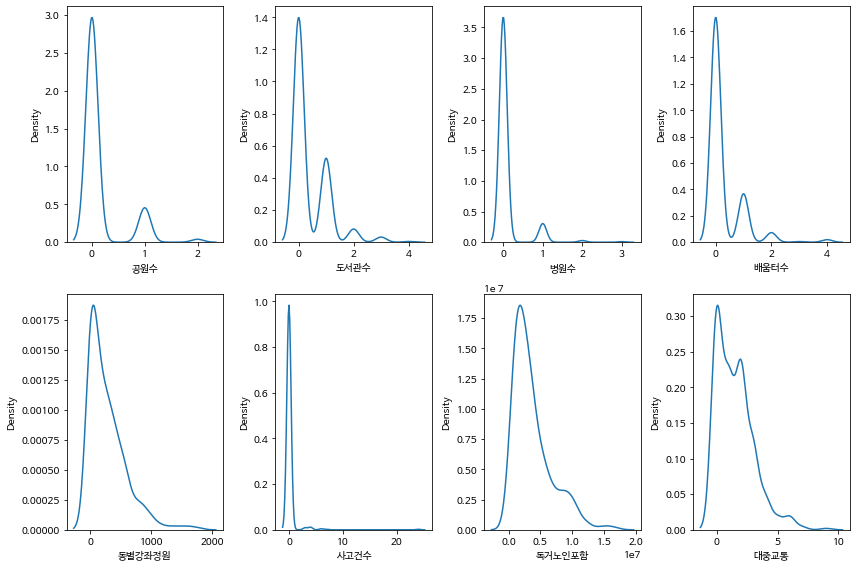

In [ ]:
# 연속형 분포확인

others = ['공원수', '도서관수', '병원수', '배움터수', '동별강좌정원', 
          '사고건수','독거노인포함', '대중교통']
fig, ax = plt.subplots(2, 4, figsize=(12, 8))
for i, valu in enumerate(others):
    m = i // 4
    n = i % 4
    sns.kdeplot(x =valu, data=final_merge, ax=ax[m, n])

plt.tight_layout()
plt.show()

In [ ]:
final_merge.describe()

,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,4.490000e+02,449.000000
mean,0.153675,0.391982,0.095768,0.278396,276.661470,0.167038,3.727495e+06,1.507795
std,0.390731,0.663142,0.337010,0.623571,310.512093,1.336700,3.050386e+06,1.523787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.700000e+01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.459413e+06,0.000000
50%,0.000000,0.000000,0.000000,0.000000,192.000000,0.000000,2.816461e+06,1.000000
75%,0.000000,1.000000,0.000000,0.000000,418.000000,0.000000,5.024528e+06,2.000000
max,2.000000,4.000000,3.000000,4.000000,1780.000000,24.000000,1.695978e+07,9.000000


In [ ]:
df1= final_merge.copy().iloc[:, 3:]  # 분포 보기 위해 연속형 변수만 df1로 정의
df1

,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통
0,0.0,0.0,0.0,0.0,70,0.0,1358396,1.0
1,1.0,2.0,0.0,0.0,50,0.0,1087370,1.0
2,1.0,0.0,1.0,2.0,360,0.0,2558435,5.0
3,0.0,1.0,0.0,0.0,0,0.0,161760,3.0
4,0.0,1.0,0.0,0.0,0,0.0,277352,2.0
...,...,...,...,...,...,...,...,...
446,0.0,0.0,0.0,0.0,443,3.0,5942970,2.0
447,0.0,0.0,0.0,1.0,489,0.0,943800,3.0
448,0.0,2.0,0.0,1.0,0,0.0,1988884,2.0
449,0.0,0.0,0.0,0.0,620,4.0,857460,1.0


In [ ]:
df2 = df1.corr()  # 각 열 간의 상관계수를 반환하는 메서드

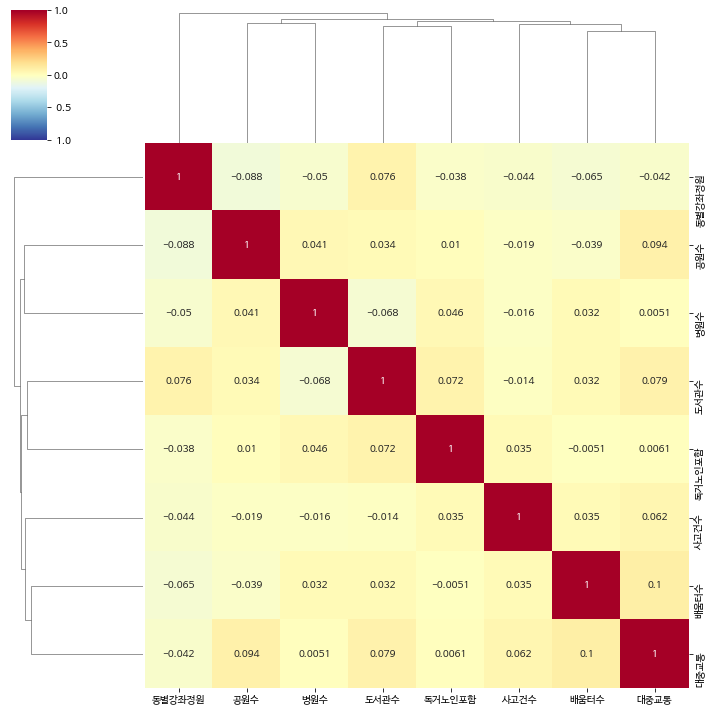

In [ ]:
sns.clustermap(df2,
               annot=True,       # 실제 값 화면에 나타내기
               cmap='RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin=-1, vmax=1)  # 컬러차트 -1 ~ 1 범위로 표시
plt.show()

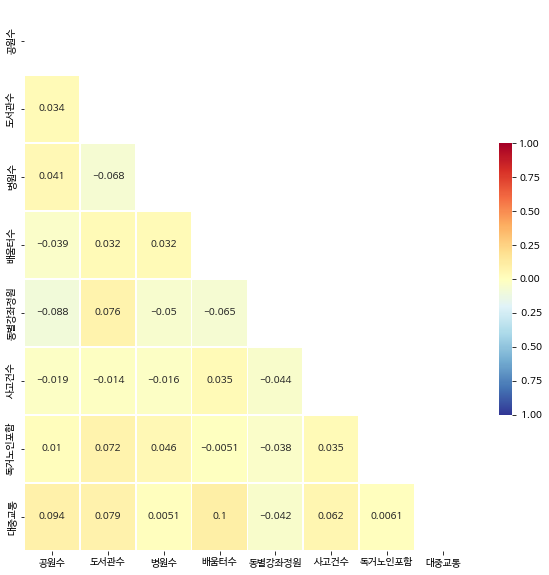

In [ ]:
# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(10, 10))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형은 False)
mask = np.zeros_like(df2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(df2,
               annot=True,
               cmap='RdYlBu_r',
               mask=mask,                # 표시하지 않을 마스크 부분 지정
               linewidths=.5,            # 경계면 실선으로 구분
               cbar_kws={"shrink": .5},  # 컬러바 크기 절반으로 줄이기
               vmin=-1, vmax=1
               )
plt.show()